# Data Frame의 분석용 함수 (기본통계)
- 평균/편차/분산/표준편차/공분산/상관계수

## 분석함수의 종류

In [8]:
## 평균, 편차, 분산, 표준편차, 공분산, 상관계수

import numpy as np
arr = np.array([4,6,1,3,8,8], dtype = np.int32)

''' 분석함수 종류 '''
print(arr)
print(arr.sum())
print(np.sum(arr))
print(np.mean(arr))
print(np.var(arr))
print(np.std(arr)) 


[4 6 1 3 8 8]
30
30
5.0
6.666666666666667
2.581988897471611


 ## 공분산
- 산점도 찍기

[ 25.6   0.6  -3.4  -2.4  -0.4  -6.4   3.6 -11.4   4.6 -10.4]
[ 0.6 -4.4  1.6 -5.4  6.6 -6.4  6.6 -0.4 -1.4  2.6]
5.933333333333334
[[109.6          5.93333333]
 [  5.93333333  20.93333333]]


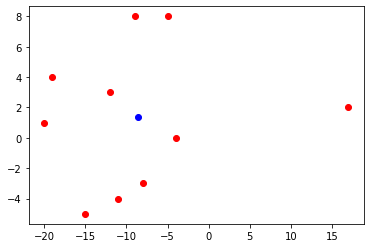

In [38]:
''' 공분산 '''

# 공분산 (경향의 확인 not 강도): 두 확률변수의 편차의 곱의 평균으로 표현

# 그래프 그려보기 

import numpy as np
import matplotlib.pyplot as plt

## conda install matplotlib
np.random.seed(1)

x = np.random.randint(-20,20,(10,))
y = np.random.randint(-10,10,(10,))

x_mean = x.mean()
y_mean = y.mean()

x_dev= x-x_mean
y_dev= y-y_mean




## 공분산을 수작업으로 도출해보자

print(x_dev)
print(y_dev)

result = 0
for i in range(10):
        result+=(x_dev[i]*y_dev[i])


myCov= result/9 # 모공분산 : 원래 공식
                 # 표준공분산 : (n-1)로 나누면 -> 추정치가 좋아짐
    
print(myCov)



# 공분산 출력 함수: np.cov
print(np.cov(x,y))

    

'''산점도 '''

plt.scatter(x,y,color = "red")
plt.scatter(x_mean, y_mean, color ="blue")
plt.show()



### 공분산 실습) KOSPI지수를 이용해 공분산 출력해보기

In [1]:
## 공분산이 양수인경우 (KOSPI지수와 삼성전자 주가)


import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
# conda install pandas_datareader --> 설치 되지 않음(adaconda repository에서 찾을 수 없기 때문)
# 대신 다음의 명령어로 설치할 것 : pip install pandas_datareader (기본 파이선 repository에서 찾아 설치)

from datetime import datetime



'''삼성 &코스피'''
## KOSPI 지수와 삼성전자 주가 / 남북경협주와 방산주의 관계를 살펴보기 위해
## 특정날짜를 이용해 금융데이터를 가져올 것


# Step1 : 두 날짜 사이에 금융데이터를 가져오도록 하기위해 시작날짜와 끝날자를 저장
start = datetime(2018,1,1) # 시작날짜
end = datetime(2018,12,31) # 끝날짜 




# Step2: pdr을 이용해 온라인에서 코스피 데이터를 불러와 데이터프레임으로 만들기 
'''network 환경때문에 접근이 불가능하여 불러올 수는 없었음 => 대신 step2-2'''
    # df_KOSPI= pdr.DataReader("^KS11","yahoo",start,end) # 무엇을,어디서, 언제부터, 언제까지
    #             # ^KS11 : 한국 코스피 지수
    #             # yahoo : 코스피지수를 제공하는 여러 웹사이트 중 하나를 지정
    # df_KOSPI.to_json("./data/KOSPI.json") 
    # display(df_KOSPI) 




# Step2-2: 제공된 JSON 파일을 이용해 DataFrame을 작성 (pdr불러오기 대신)
        # JSON을 불러들여 데이터 프레임을 2개 만들기 (KOSPI.json, SE.json)

import json

        # 파일내용을 읽어 (json) dicct로 변환 후 dict를 이용해 DataFrame을 생성
file_KOSPI = open("./data/KOSPI.json","r")
file_SE = open("./data/SE.json","r")
df_KOSPI = pd.DataFrame(json.load(file_KOSPI))
df_SE = pd.DataFrame(json.load(file_SE))

# Step3 :  종가 colum만 잘라내기

close_KOSPI = df_KOSPI["Close"]
close_SE = df_SE["Close"]

# Step4 : Cov함수 이용해 공분산 계산하기

print(np.cov(close_KOSPI,close_SE))  # 490222.10530186  -> 양수 -> 양의 경향




'''LIG 넥스원 & 부산산업(남북경협주)를 대상으로 공분산 계산'''

file_LIG = open("./data/LIG넥스원.json","r")
file_busan = open("./data/부산산업.json","r")

df_LIG = pd.DataFrame(json.load(file_LIG))
df_busan = pd.DataFrame(json.load(file_busan))

close_LIG = df_LIG["Close"]
close_busan = df_busan["Close"]

cov = np.cov(close_LIG,close_busan)

print(cov)

[[   24177.23140621   490222.10530186]
 [  490222.10530186 11919911.50745463]]
[[ 6.35924170e+07 -3.86535936e+08]
 [-3.86535936e+08  4.64762211e+09]]


## 상관관계 / 상관계수

In [22]:
'''개념잡기'''
# 상관관계(correlation): 두 대상이 서로 연관성이 있다고 추척되는 관계
# 상관계수(correlation coefficient) : 
#     대표적으로 피어슨 상관계수를 이용함
#     공분산을 각 확률변수의 표준편차의 곱으로 나눠준 값
#     -1 ~ 1사이의 값을 가짐
#       양수일 경우 양의 상관관계 
#       음수일 경우 음의 상관관계 (부적상관)
#     상관계수는 인과성을 보장하지 않음에 유의


import numpy as np
import pandas as pd

file_KOSPI = open("C:/python_DA/data/KOSPI.json")
series_KOSPI = pd.DataFrame(json.load(file_KOSPI))["Close"]
df_KOSPI = pd.DataFrame(series_KOSPI)
display(df_CLOSE)

file_SE = open("C:/python_DA/data/SE.json")
series_SE = pd.DataFrame(json.load(file_SE))["Close"]
df_SE = pd.DataFrame(series_SE)

np.cov(series_KOSPI, series_SE)
np.corrcoef(series_KOSPI,series_SE)
np.corrcoef(df_KOSPI,df_SE)  # error
np.corrcoef(df_KOSPI["Close"],df_SE["Close"])



,Close
1514851200000,51020.0
1514937600000,51620.0
1515024000000,51080.0
1515110400000,52120.0
1515369600000,52020.0
...,...
1545350400000,38650.0
1545609600000,38800.0
1545782400000,38350.0
1545868800000,38250.0


array([[1.        , 0.91317306],
       [0.91317306, 1.        ]])

In [31]:
import numpy as np
import pandas as pd


file_KOSPI = open("C:/python_DA/data/KOSPI.json")
series_KOSPI = pd.DataFrame(json.load(file_KOSPI))["Close"]

file_SE = open("C:/python_DA/data/SE.json")
series_SE = pd.DataFrame(json.load(file_SE))["Close"]

file_SE = open("C:/python_DA/data/부산산업.json")
series_Busan = pd.DataFrame(json.load(file_SE))["Close"]



'''세 개의 시리즈를 데이터 프레임으로 묶기'''
# Dictionary를 활용한다

data = {
    "KOSPI":series_KOSPI, 
    "SE":series_SE, 
    "Busan": series_Busan    
}

df = pd.DataFrame(data)
df.head()


'''pandas(dataframe)의 상관계수 확인하기'''
display(df.corr())
display(df.cov())

,KOSPI,SE,Busan
KOSPI,1.000000,0.913173,-0.576688
SE,0.913173,1.000000,-0.468954
Busan,-0.576688,-0.468954,1.000000


,KOSPI,SE,Busan
KOSPI,2.417723e+04,4.902221e+05,-6.113070e+06
SE,4.902221e+05,1.191991e+07,-1.103778e+08
Busan,-6.113070e+06,-1.103778e+08,4.647622e+09


##  Sum과 Mean()

In [57]:
# DataFrame에서 Sum함숭와 ___함수 사용

import numpy as np
import pandas as pd


# 중첩리스트를 이용해 DataFrame을 생성해보자 
data = [[2, np.nan],
        [7,-3],
        [np.nan,np.nan],
        [1,-2]]

df = pd.DataFrame(data,
                 columns = ["one","two"],
                 index = ["a", "b", "c", "d"])
display(df)

# numpy의 sum은 axis를 기준으로 합하고, axis가 없으면 모든 셀을 다 더했음
# pandas는 axis를 주지 않으면 default= 0

# Sum()
#   결과값은 series로 나타남
#   Sum은 Nan을 0으로 처리함
df.sum() 
df.sum(axis=1)  
df["two"].sum()   #-5
df.loc["b"].sum() # 4

# Mean()
#     NaN은 실수처리, 모든 연산 결과는 NaN
#     skipna옵션 사용
df.mean(axis = 0, skipna=False) # NaN은 실수처리, 모든 연산 결과는 NaN
mmean= df.mean(axis = 0, skipna=True)
display(mmean)
mmean["one"]


,one,two
a,2.0,NaN
b,7.0,-3.0
c,NaN,NaN
d,1.0,-2.0


one    3.333333
two   -2.500000
dtype: float64

3.3333333333333335

### 연습문제 

"One" column의 결측값은 'one' column의 평균으로
"Two" column의 결측값은 'Two'  column의 최소값으로 대체하기

In [71]:
import numpy as np
import pandas as pd

data = [[2, np.nan],
        [7,-3],
        [np.nan,np.nan],
        [1,-2]]

df = pd.DataFrame(data,
                 columns = ["one","two"],
                 index = ["a", "b", "c", "d"])
display(df)

# 선생님 방법
one_avg = df["one"].mean(axis = 0, skipna = True)
two_min = df["two"].mean(axis = 0)

df["one"] = df["one"].fillna(value=one_avg,inplace=False)
df["two"] = df["two"].fillna(value=two_min, inplace=False)
display(df)

#마이웨이
df["one"]= df["one"].fillna(value=df.mean()["one"],inplace=False)
df["two"]= df["two"].fillna(value=df.max()["two"],inplace=False)
display(df)


,one,two
a,2.0,NaN
b,7.0,-3.0
c,NaN,NaN
d,1.0,-2.0


,one,two
a,2.000000,-2.5
b,7.000000,-3.0
c,3.333333,-2.5
d,1.000000,-2.0


,one,two
a,2.000000,-2.5
b,7.000000,-3.0
c,3.333333,-2.5
d,1.000000,-2.0


## 정렬 sort_index(), sort_values()

- 정렬 시작 전, 데이터프레임을 랜덤으로 형성하기

In [91]:
# DataFrame의 함수에 대해 조금 더 알아보자
# 분석용함수(Sum,Mean,Cov,Corr)
# 정렬에 대해 알아보자

import numpy as np
import pandas as pd

# random으로 정수형 난수를 발생시킬것
np.random.seed(100)

df = pd.DataFrame(np.random.randint(0,10,(6,4)))
display(df)

df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101",periods = 6)

display(df)


random_index = np.random.permutation(df.index)
     # permutation: 순열로 되어있는 데이터를 받아(ex.list) 섞어주는 함수

new_df= df.reindex(index = random_index, columns = ["B","A","D","C"]) 
display(new_df)


,0,1,2,3
0,8,8,3,7
1,7,0,4,2
2,5,2,2,2
3,1,0,8,4
4,0,9,6,2
5,4,1,5,3


,A,B,C,D
2019-01-01,8,8,3,7
2019-01-02,7,0,4,2
2019-01-03,5,2,2,2
2019-01-04,1,0,8,4
2019-01-05,0,9,6,2
2019-01-06,4,1,5,3


,B,A,D,C
2019-01-01,8,8,7,3
2019-01-03,2,5,2,2
2019-01-02,0,7,2,4
2019-01-04,0,1,4,8
2019-01-06,1,4,3,5
2019-01-05,9,0,2,6


- sort_index(), sort_values()  정렬함수 사용

In [90]:

# dataframe정렬 -> 축을 명시해야함

'''index기준'''
    # 정렬의 기본은 오름차순 (행단위)
new_df.sort_index(axis = 0)

    # 행 단위 내림차순
new_df.sort_index(axis = 0, ascending = False)

'''특정 열 기준'''
display(new_df.sort_values(by="A"))
display(new_df.sort_values(by=["A","B"]))





,B,A,D,C
2019-01-05,9,0,2,6
2019-01-04,0,1,4,8
2019-01-06,1,4,3,5
2019-01-03,2,5,2,2
2019-01-02,0,7,2,4
2019-01-01,8,8,7,3


,B,A,D,C
2019-01-05,9,0,2,6
2019-01-04,0,1,4,8
2019-01-06,1,4,3,5
2019-01-03,2,5,2,2
2019-01-02,0,7,2,4
2019-01-01,8,8,7,3


## unique(), value_counts(),isin()

In [101]:
import numpy as np
import pandas as pd

## 랜덤 수로 DF생성
np.random.seed(1)
df = pd.DataFrame(np.random.randint(0,10,(6,4)))
df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101", periods = 6)
display(df)

## 새로운 컬럼을 만들어보자
        # 
df["E"] = ["AA","BB","CC","DD","AA","BB"]
display(df)


## Unique()함수 : 중복을 없애서 종류를 확인해보자
df["E"].unique()
print(df["E"].unique())       # ndarray로 리턴된다
print(df["E"].value_counts()) # Series로 리턴된다
print(df["E"].isin(["AA","CC"])) # E열안에 AA또는 CC가 있나? 
                # -> broadcasting -> boolean mask로 출력
                # 행추출 용 mask를 생성할 때 자주 사용하는 함수
        



,A,B,C,D
2019-01-01,5,8,9,5
2019-01-02,0,0,1,7
2019-01-03,6,9,2,4
2019-01-04,5,2,4,2
2019-01-05,4,7,7,9
2019-01-06,1,7,0,6


,A,B,C,D,E
2019-01-01,5,8,9,5,AA
2019-01-02,0,0,1,7,BB
2019-01-03,6,9,2,4,CC
2019-01-04,5,2,4,2,DD
2019-01-05,4,7,7,9,AA
2019-01-06,1,7,0,6,BB


['AA' 'BB' 'CC' 'DD']
AA    2
BB    2
CC    1
DD    1
Name: E, dtype: int64
2019-01-01     True
2019-01-02    False
2019-01-03     True
2019-01-04    False
2019-01-05     True
2019-01-06    False
Freq: D, Name: E, dtype: bool


## Rambda 식
- 이름이 없는 함수

일반적으로 함수는 함수의 이름을 먼저 지정하고 시작한다
그러나 람다는 이름이 없는 함수이다
따라서 긴 코드를 갖는 함수 작성에는 적합하지 않으나, 
수행코드가 한 줄인 간단한 코드를 작성할 때 사용한다

### (Apply와 map의 구분 )

In [106]:
import numpy as np
import pandas as pd

np.random.seed(999)
df = pd.DataFrame(np.random.randint(0,10,(6,4)))
df.columns = ["A","B","C","D"]
df.index = pd.date_range("20190101", periods = 6)
display(df)

## 각 행의 최대값 - 최소값으로 컬럼을 하나 더 만들자

func = lambda x : x.max()-x.min()
df["최대-최소"] = df.apply(func,axis=1)
        # apply: data frame에 대해, 특정 함수를 행또는 열로 적용
    
display(df)

  ## 지정한 함수를 Data Frame에 반복적으로 적용 : apply 함수
        # 반드시 axis를 지정해야함
  ## 지정한 함수를 Series에 반복적용 : map 함수




,A,B,C,D
2019-01-01,0,5,1,8
2019-01-02,1,9,3,0
2019-01-03,5,8,8,0
2019-01-04,5,2,5,7
2019-01-05,4,6,2,7
2019-01-06,6,1,5,3


,A,B,C,D,최대-최소
2019-01-01,0,5,1,8,8
2019-01-02,1,9,3,0,9
2019-01-03,5,8,8,0,8
2019-01-04,5,2,5,7,5
2019-01-05,4,6,2,7,5
2019-01-06,6,1,5,3,5


<공지사항> 11월 28일 (목요일) or 월요일

필답평가..약 30문학 (R과 Python) : R위주
수행평가..3문항(수업시간에 진행한 실습을 정리, 제출)

# Data Frame 결합(Merge)
### inner join, outer join(full), left join, right join

In [114]:
import numpy as np
import pandas as pd

data1 = {
    "학번": [1,2,3,4],
    "이름": ["홍길동","최길동", "아이유", "김연아"],
    "학년": [2,3,3,1]    
}

data2 = {
    "학번": [1,2,4,5],
    "학과": ["컴퓨터", "미술", "철학", "사회"],
    "학점": [1.3,3.5,4.3,2.3]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

display(df1)
display(df2)

display(pd.merge(df1, df2, on="학번", how="inner"))

display(pd.merge(df1, df2, on="학번", how="outer"))

display(pd.merge(df1, df2, on="학번", how="left"))
display(pd.merge(df1, df2, on="학번", how="right"))


,학번,이름,학년
0,1,홍길동,2
1,2,최길동,3
2,3,아이유,3
3,4,김연아,1


,학번,학과,학점
0,1,컴퓨터,1.3
1,2,미술,3.5
2,4,철학,4.3
3,5,사회,2.3


,학번,이름,학년,학과,학점
0,1,홍길동,2,컴퓨터,1.3
1,2,최길동,3,미술,3.5
2,4,김연아,1,철학,4.3


,학번,이름,학년,학과,학점
0,1,홍길동,2.0,컴퓨터,1.3
1,2,최길동,3.0,미술,3.5
2,3,아이유,3.0,NaN,NaN
3,4,김연아,1.0,철학,4.3
4,5,NaN,NaN,사회,2.3


,학번,이름,학년,학과,학점
0,1,홍길동,2,컴퓨터,1.3
1,2,최길동,3,미술,3.5
2,3,아이유,3,NaN,NaN
3,4,김연아,1,철학,4.3


,학번,이름,학년,학과,학점
0,1,홍길동,2.0,컴퓨터,1.3
1,2,최길동,3.0,미술,3.5
2,4,김연아,1.0,철학,4.3
3,5,NaN,NaN,사회,2.3


In [117]:
import numpy as np
import pandas as pd

data1 = {
    "학번": [1,2,3,4],
    "이름": ["홍길동","최길동", "아이유", "김연아"],
    "학년": [2,3,3,1]    
}

data2 = {
    "학생학번": [1,2,4,5],
    "학과": ["컴퓨터", "미술", "철학", "사회"],
    "학점": [1.3,3.5,4.3,2.3]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

display(df1)
display(df2)

display(pd.merge(df1, df2, 
                 left_on="학번", 
                 right_on="학생학번", 
                 how="inner"))

#학번과 학생학번이 같이 출력된다는 점만 유의

,학번,이름,학년
0,1,홍길동,2
1,2,최길동,3
2,3,아이유,3
3,4,김연아,1


,학생학번,학과,학점
0,1,컴퓨터,1.3
1,2,미술,3.5
2,4,철학,4.3
3,5,사회,2.3


,학번,이름,학년,학생학번,학과,학점
0,1,홍길동,2,1,컴퓨터,1.3
1,2,최길동,3,2,미술,3.5
2,4,김연아,1,4,철학,4.3


- index를 이용하기

In [122]:
# 한 쪽만 index를 사용

data1 = {
    "학번": [1,2,3,4],
    "이름": ["홍길동","최길동", "아이유", "김연아"],
    "학년": [2,3,3,1]    
}

data2 = {
    "학과": ["컴퓨터", "미술", "철학", "사회"],
    "학점": [1.3,3.5,4.3,2.3]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df2.index = [1,2,4,5]

display(df1)
display(df2)
display(pd.merge(df1, df2, 
                 left_on="학번", 
                 right_index = True, 
                 how="inner"))

# 둘 다 index 인 경우

data1 = {
    "이름": ["홍길동","최길동", "아이유", "김연아"],
    "학년": [2,3,3,1]    
}

data2 = {
    "학과": ["컴퓨터", "미술", "철학", "사회"],
    "학점": [1.3,3.5,4.3,2.3]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1.index = [1,2,3,4]
df2.index = [1,2,4,5]

display(df1)
display(df2)
display(pd.merge(df1, df2, 
                 left_index=True, 
                 right_index = True, 
                 how="inner"))


,학번,이름,학년
0,1,홍길동,2
1,2,최길동,3
2,3,아이유,3
3,4,김연아,1


,학과,학점
1,컴퓨터,1.3
2,미술,3.5
4,철학,4.3
5,사회,2.3


,학번,이름,학년,학과,학점
0,1,홍길동,2,컴퓨터,1.3
1,2,최길동,3,미술,3.5
3,4,김연아,1,철학,4.3


,이름,학년
1,홍길동,2
2,최길동,3
3,아이유,3
4,김연아,1


,학과,학점
1,컴퓨터,1.3
2,미술,3.5
4,철학,4.3
5,사회,2.3


,이름,학년,학과,학점
1,홍길동,2,컴퓨터,1.3
2,최길동,3,미술,3.5
4,김연아,1,철학,4.3


In [3]:
# Series를 연결해 DF를 생성하기

import numpy as np
import pandas as pd

s1 = pd.Series([0,1], index = ["a","c"])
s2 = pd.Series([4,3,2], index = ["b","c","e"])

display(pd.concat([s1,s2], axis = 0))
display(pd.concat([s1,s2], axis = 1, sort = True))


a    0
c    1
b    4
c    3
e    2
dtype: int64

,0,1
a,0.0,NaN
b,NaN,4.0
c,1.0,3.0
e,NaN,2.0


## 멀티인덱스

### Series의 다중인덱스

In [15]:
import numpy as np
import pandas as pd

np.random.seed(1)

'''멀티인덱스의 이해 - Series에서 사용해보기 '''

s = pd.Series(np.random.randint(1,5,(6,)), 
               index = [["총무처", "관리처", "정보전산처", "총무처", "관리처", "정보전산처"], 
                       ["인력개발팀", "건축팀", "개발팀", "재무팀", "안전팀", "운영팀"]]
             )
    # 인덱스를 계층형으로 사용할 수 있음
    
# print(s)



'''하나의 인덱스로 추출(indexing)'''

### 총무처만 추출하려면? 
print(s["총무처"])


'''복수 인덱스로 추출(fancy indexing)'''
### 관리처와 정보전산처를 추출

# s["관리처","정보전산처"] -> error
s[["관리처","정보전산처"]]



''' tuple을 이용해 인덱스 위계를 지정해 추출하기'''
# 총무처의 재무팀 인원은 몇명인가? => tuple이용 (1차,2차,3차)
print(s[("총무처","재무팀")])

      # 튜플은 생략도 가능하다
print(s["총무처","재무팀"]) # 위계적인 인덱스일 때에는 결과가 추출된다




''' 2차 인덱스만 지정해 추출하기'''
print(s[:,"재무팀"] )
# s[(:,"재무팀")] -> 오류남. 문법적으로 오류임에 주의


인력개발팀    2
재무팀      1
dtype: int32
1
1
총무처    1
dtype: int32


### Data Frame의 다중인덱스

In [58]:
import numpy as np
import pandas as pd

np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),
                 index = [["총무처", "관리처", "정보전산처", "총무처", "관리처", "정보전산처"], 
                       ["인력개발팀", "건축팀", "개발팀", "재무팀", "안전팀", "운영팀"]],
                 columns = [["아시아","유럽","아시아","유럽","아시아"], 
                            ["한국", "독일", "일본", "프랑스", "중국"]])

# 정렬
new_df = df.sort_index(axis=0)
new_df = new_df.sort_index(axis=1)
display(new_df)


# 열 추출 
df["아시아"] # df


# 행 추출
new_df.loc["총무처"] # df
new_df.loc[("총무처", "재무팀")] # series 출력 


# 아시아지역 중국의 정보전산처 개발팀 인원은 몇명인가
new_df[("아시아","중국")].loc[("정보전산처","개발팀")]
            # loc[행,열]
new_df.loc[("정보전산처","개발팀"),("아시아","중국")]



아시아       유럽    
             일본 중국 한국 독일 프랑스
관리처   건축팀     3  1  4  1   3
      안전팀     1  1  1  4   3
정보전산처 개발팀     3  3  3  2   3
      운영팀     2  3  4  2   3
총무처   인력개발팀   4  4  1  1   4
      재무팀     1  4  3  2   1

3

In [68]:
import numpy as np
import pandas as pd

np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),
                 index = [["총무처", "관리처", "정보전산처", "총무처", "관리처", "정보전산처"], 
                       ["인력개발팀", "건축팀", "개발팀", "재무팀", "안전팀", "운영팀"]],
                 columns = [["아시아","유럽","아시아","유럽","아시아"], 
                            ["한국", "독일", "일본", "프랑스", "중국"]])


'''멀티 인덱스, 멀티 컬럼의 이름 붙이기'''
df.index.names = ["부처","팀"]
df.columns.names = ["대륙","국가"]


display(df)



,대륙,아시아,유럽,아시아,유럽,아시아
,국가,한국,독일,일본,프랑스,중국
부처,팀,,,,,
총무처,인력개발팀,1,1,4,4,4
관리처,건축팀,4,1,3,3,1
정보전산처,개발팀,3,2,3,3,3
총무처,재무팀,3,2,1,1,4
관리처,안전팀,1,4,1,3,1
정보전산처,운영팀,4,2,2,3,3


* 인덱스 기준 정렬

In [71]:


'''sort_index의 level속성으로 정렬 기준 인덱스의 차수를 지정하기'''

# 팀이름으로 내림차순 정렬
df.sort_index(axis=0, level=1, ascending =False) # 부처별로 정렬됨
df.sort_index(axis=0, level="팀", ascending =False) # 부처별로 정렬됨


# 국가별로 컬럼을 오름차순 정렬
df.sort_index(axis=1, level="국가")


대륙          유럽 아시아     유럽 아시아
국가          독일  일본 중국 프랑스  한국
부처    팀                      
총무처   인력개발팀  1   4  4   4   1
관리처   건축팀    1   3  1   3   4
정보전산처 개발팀    2   3  3   3   3
총무처   재무팀    2   1  4   1   3
관리처   안전팀    4   1  1   3   1
정보전산처 운영팀    2   2  3   3   4

* 값기준 정렬

In [92]:
np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),
                 index = [["총무처", "관리처", "정보전산처", "총무처", "관리처", "정보전산처"], 
                       ["인력개발팀", "건축팀", "개발팀", "재무팀", "안전팀", "운영팀"]],
                 columns = [["아시아","유럽","아시아","유럽","아시아"], 
                            ["한국", "독일", "일본", "프랑스", "중국"]])

df.index.names = ["부처","팀"]
df.columns.names = ["대륙","국가"]

# 아시아지역의 한국 직원수를 기준으로 내림차순 정렬해라

df.sort_values(by=("아시아","한국"), ascending = False)

# 아시아지역의 한국직원수를 기준으로 내림차순 정렬하고 동률이 있다면 일본을 기준으로 내림차순 정렬
df.sort_values(by=[("아시아","한국"),("아시아","일본")], ascending = False)

# 아시아지역의 한국직원수를 기준으로 내림차순 정렬하고 동률이 있다면 일본을 기준으로 오름차순 정렬
df.sort_values(by=[("아시아","한국"),("아시아","일본")], ascending = [False,True])

,대륙,아시아,유럽,아시아,유럽,아시아
,국가,한국,독일,일본,프랑스,중국
부처,팀,,,,,
정보전산처,운영팀,4,2,2,3,3
관리처,건축팀,4,1,3,3,1
총무처,재무팀,3,2,1,1,4
정보전산처,개발팀,3,2,3,3,3
관리처,안전팀,1,4,1,3,1
총무처,인력개발팀,1,1,4,4,4


* DataFrame에 대한 Sum과 Mean

In [115]:
np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),
                 index = [["총무처", "관리처", "정보전산처", "총무처", "관리처", "정보전산처"], 
                       ["인력개발팀", "건축팀", "개발팀", "재무팀", "안전팀", "운영팀"]],
                 columns = [["아시아","유럽","아시아","유럽","아시아"], 
                            ["한국", "독일", "일본", "프랑스", "중국"]])

df.index.names = ["부처","팀"]
df.columns.names = ["대륙","국가"]


# 각 도시별 직원수의 합은??
df.sum(axis=0)

# 각 도시 부처별 직원수의 합은? 
df.sum(axis = 0, level ="부처")

# 각 도시 팀별 직원수의 합은? 
df.sum(axis = 0, level =1)

# 모든 지역의 각 부처-팀별 평균 인원은? 
df.mean(axis=1)



# 합계 행 생성

df.loc[("All", "All"), :] = df.sum()
df

,대륙,아시아,유럽,아시아,유럽,아시아
,국가,한국,독일,일본,프랑스,중국
부처,팀,,,,,
총무처,인력개발팀,1.0,1.0,4.0,4.0,4.0
관리처,건축팀,4.0,1.0,3.0,3.0,1.0
정보전산처,개발팀,3.0,2.0,3.0,3.0,3.0
총무처,재무팀,3.0,2.0,1.0,1.0,4.0
관리처,안전팀,1.0,4.0,1.0,3.0,1.0
정보전산처,운영팀,4.0,2.0,2.0,3.0,3.0
All,All,16.0,12.0,14.0,17.0,16.0


### Stack and unstack

In [116]:
np.random.seed(100)
df = pd.DataFrame(np.random.randint(1,5,(6,5)),
                 index = [["총무처", "관리처", "정보전산처", "총무처", "관리처", "정보전산처"], 
                          ["인력개발팀", "건축팀", "개발팀", "재무팀", "안전팀", "운영팀"]],
                 columns = [["아시아","유럽","아시아","유럽","아시아"], 
                            ["한국", "독일", "일본", "프랑스", "중국"]])

df.index.names = ["부처","팀"]
df.columns.names = ["대륙","국가"]

display(df.stack("대륙"))
display(df.unstack("부처"))



국가                독일   일본   중국  프랑스   한국
부처    팀     대륙                          
총무처   인력개발팀 아시아  NaN  4.0  4.0  NaN  1.0
            유럽   1.0  NaN  NaN  4.0  NaN
관리처   건축팀   아시아  NaN  3.0  1.0  NaN  4.0
            유럽   1.0  NaN  NaN  3.0  NaN
정보전산처 개발팀   아시아  NaN  3.0  3.0  NaN  3.0
            유럽   2.0  NaN  NaN  3.0  NaN
총무처   재무팀   아시아  NaN  1.0  4.0  NaN  3.0
            유럽   2.0  NaN  NaN  1.0  NaN
관리처   안전팀   아시아  NaN  1.0  1.0  NaN  1.0
            유럽   4.0  NaN  NaN  3.0  NaN
정보전산처 운영팀   아시아  NaN  2.0  3.0  NaN  4.0
            유럽   2.0  NaN  NaN  3.0  NaN

대륙     아시아              유럽             아시아              유럽             아시아  \
국가      한국              독일              일본             프랑스              중국   
부처     관리처 정보전산처  총무처  관리처 정보전산처  총무처  관리처 정보전산처  총무처  관리처 정보전산처  총무처  관리처   
팀                                                                            
개발팀    NaN   3.0  NaN  NaN   2.0  NaN  NaN   3.0  NaN  NaN   3.0  NaN  NaN   
건축팀    4.0   NaN  NaN  1.0   NaN  NaN  3.0   NaN  NaN  3.0   NaN  NaN  1.0   
안전팀    1.0   NaN  NaN  4.0   NaN  NaN  1.0   NaN  NaN  3.0   NaN  NaN  1.0   
운영팀    NaN   4.0  NaN  NaN   2.0  NaN  NaN   2.0  NaN  NaN   3.0  NaN  NaN   
인력개발팀  NaN   NaN  1.0  NaN   NaN  1.0  NaN   NaN  4.0  NaN   NaN  4.0  NaN   
재무팀    NaN   NaN  3.0  NaN   NaN  2.0  NaN   NaN  1.0  NaN   NaN  1.0  NaN   

대륙                
국가                
부처    정보전산처  총무처  
팀                 
개발팀     3.0  NaN  
건축팀     NaN  NaN  
안전팀     NaN  NaN  
운영팀     3.0  NaN  
인력개발팀   NaN  4.0  
재무팀     NaN  4.0

In [126]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "이름": ["민애","소영","진수","지수","영희"],
    "성적": [1.5,4.4,4.5,2.3,4.0],
    "학과": ["컴퓨터","철학","컴퓨터","철학","컴퓨터"],
    "학년": [1,2,3,2,2]})

display(df)

new_df = df.set_index(["학과","학년"])
display(new_df)

origin_df = new_df.reset_index()

display(origin_df)

,이름,성적,학과,학년
0,민애,1.5,컴퓨터,1
1,소영,4.4,철학,2
2,진수,4.5,컴퓨터,3
3,지수,2.3,철학,2
4,영희,4.0,컴퓨터,2


,,이름,성적
학과,학년,,
컴퓨터,1,민애,1.5
철학,2,소영,4.4
컴퓨터,3,진수,4.5
철학,2,지수,2.3
컴퓨터,2,영희,4.0


,학과,학년,이름,성적
0,컴퓨터,1,민애,1.5
1,철학,2,소영,4.4
2,컴퓨터,3,진수,4.5
3,철학,2,지수,2.3
4,컴퓨터,2,영희,4.0


In [138]:
import numpy as np
import pandas as pd

np.random.seed(1)

df = pd.DataFrame(np.random.randint(1,5,(2,3)),
                 index = ["서울", "부산"], 
                 columns = ["마케팅","개발","운영"])

display(df)

new_df = df.stack() # column을 index의 최하위 index로 생성
display(new_df)

# stack과 unstack을 잘 이용하면 행과 열을 바꿀 수 있다
origin_df = new_df.unstack(level = 0)
display(origin_df)




,마케팅,개발,운영
서울,2,4,1
부산,1,4,2


서울  마케팅    2
    개발     4
    운영     1
부산  마케팅    1
    개발     4
    운영     2
dtype: int32

,서울,부산
마케팅,2,1
개발,4,4
운영,1,2


### 중복행 제거(추출) .drop_duplicates(), .duplicated()

In [152]:
import numpy as np
import pandas as pd

df = pd.DataFrame({"K1" : ["one"]*3  + ["two"]*4,
                  "k2": [1,1,2,3,3,4,4],
                  })
display(df)

print(df.duplicated()) # mask

## duplicated(): Mask를 만듦

df.loc[df.duplicated(),:] ## 모든 중복항이 다 나온다
df.loc[~df.duplicated(),:] ## 중복항이 아닌 것

## drop_duplicates() 중복항을 제거한다
df.drop_duplicates() # 중복항을 모두 제거할 수 있다


,K1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool


,K1,k2
0,one,1
2,one,2
3,two,3
5,two,4


### Grouping 

In [171]:
## Data Frame의 Grouping

import numpy as np
import pandas as pd

df = pd.DataFrame({
    "이름": ["민애","소영","진수","지수","영희"],
    "성적": [1.5,4.4,4.5,2.3,4.0],
    "학과": ["컴퓨터","철학","컴퓨터","철학","컴퓨터"],
    "학년": [1,2,3,2,2]})

# 학과를 기준으로 grouping
dept = df["성적"].groupby(df["학과"])
dept.mean()

# 학과와 학년을 기준으로 grouping
dept = df["성적"].groupby([df["학과"],df["학년"]]) ## 두개로 그루핑 -> 멀티인덱스
dept.mean()
dept.mean().unstack()

######################################3
# pandas에 대한 내용이 끝난다



학년,1,2,3
학과,,,
철학,NaN,3.35,NaN
컴퓨터,1.5,4.00,4.5


# 연습문제

In [281]:
# 연습문제
# mpg data set부터 시작해보자 (차량제조사, 도시연비, 고속도로연비)
# R에서 데이터 추출해서 CSV파일로 만들고
# Pandas에서 DataFrame을 만들고 Pandas를 이용해 문제를 해결
# 공유폴더 연습문제(1105)폴더에 
# mpg data set 연습문제.txt  사용

import numpy as np
import pandas as pd


df = pd.read_csv("./data/mpgdata.csv")



del df['Unnamed: 0']
display(df)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [282]:
# # 1. displ(배기량)이 4 이하인 자동차와 
#      5 이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 
#      평균적으로 더 높은지 확인하세요.
#      배기량 4이하 : 25.96319
#      배기량 5이상 : 18.07895

a =df[["cyl","hwy"]]
un4 = a[a["cyl"]<=4]
up5 = a[a["cyl"]>=5]

mean4=un4.mean(axis=0, skipna=True)[1]
mean5=up5.mean(axis=0, skipna=True)[1]

print("배기량 4 이하 : {}".format(round(mean4,3)))
print("배기량 5 이상 : {}".format(mean5))

# print("배기량 4 이하 : {.3f}".format(mean4))
# print("배기량 5 이상 : {.3f}".format(mean5))

배기량 4 이하 : 28.802
배기량 5 이상 : 20.601307189542485


In [283]:
# # 2. 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 
#       한다. "audi"와 "toyota" 중 어느 manufacturer(제조회사)의 
#       cty(도시 연비)가 평균적으로 더 높은지 확인하세요.
#       audi : 17.6
#       toyota : 18.5

b =df[["manufacturer","cty"]]

audis = b[b["manufacturer"]=="audi"]

toyotas = b[b["manufacturer"]=="toyota"]

audimean =np.mean(audis["cty"])
toyotamean = np.mean(toyotas["cty"])

print("audi: {}".format(round(audimean,1)))
print("toyota : {}".format(round(toyotamean,1)))



audi: 17.6
toyota : 18.5


In [284]:
# # 3. "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 
#       알아보려고 한다. 이 회사들의 데이터를 추출한 후 
#        hwy(고속도로 연비) 전체 평균을 구하세요.
#       hwy 전체 평균 : 22.50943

c =df[["manufacturer","hwy"]]

chevrolet = c[c["manufacturer"]=="chevrolet"]
ford = c[c["manufacturer"]=="ford"]
honda = c[c["manufacturer"]=="honda"]

ac = pd.concat([chevrolet,ford,honda],axis = 0)["hwy"]

result = np.mean(ac)
print("hwy 전체평균 : {}".format(round(result,3)))


hwy 전체평균 : 22.509


In [285]:
# # 4. "audi"에서 생산한 자동차 중에 
#       어떤 자동차 모델의 hwy(고속도로 연비)가 높은지 
#       알아보려고 한다. 
#       "audi"에서 생산한 자동차 중 hwy가 1~5위에 해당하는 
#       자동차의 데이터를 출력하세요.
#       audi   a4            2.0     ~~~~~ 31
#       audi   a4            2.0     ~~~~~ 30
#       audi   a4            1.8     ~~~~~ 29
#       audi   a4            1.8     ~~~~~ 29
#       audi   a4 quattro  2.0     ~~~~~ 28


new_df= df.sort_values(by=["manufacturer","hwy"],ascending=[True,False])

new_df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [340]:
# # 5. mpg 데이터는 연비를 나타내는 변수가 2개입니다. 
#       두 변수를 각각 활용하는 대신 하나의 통합 연비 변수를 
#       만들어 사용하려 합니다. 평균 연비 변수는 
#       두 연비(고속도로와 도시)의 평균을 이용합니다. 
#       회사별로 "suv" 자동차의 평균 연비를 구한후 내림차순으로 
#       정렬한 후 1~5위까지 데이터를 출력하세요.
   
#       subaru   21.9
#       toyota   16.3
#       nissan    15.9
#       mercury  15.6
#       jeep       15.6

df["effi"] = df[["cty","hwy"]].mean(axis=1)

new_df = df.set_index(["manufacturer"])

dept = df["effi"].groupby([df["manufacturer"],df["class"]])
temp = pd.DataFrame(dept.mean())

result=temp.unstack()["effi","suv"].sort_values(ascending=False)

result.head(5)

manufacturer
subaru     21.916667
toyota     16.312500
nissan     15.875000
mercury    15.625000
jeep       15.562500
Name: (effi, suv), dtype: float64

In [346]:
# # 6. mpg 데이터의 class는 "suv", "compact" 등 자동차의 
#       특징에 따라 일곱 종류로 분류한 변수입니다. 
#      어떤 차종의 도시 연비가 높은지 비교하려 합니다. 
#      class별 cty 평균을 구하고 cty 평균이 높은 순으로 
#      정렬해 출력하세요.
      
#      subcompact    20.4
#      compact         20.1
#      midsize          18.8
#      minivan          15.8
#      2seater           15.4
#      suv                13.5
#      pickup            13

dept= df["cty"].groupby(df["class"])
dept.mean().sort_values(ascending=False)

class
subcompact    20.371429
compact       20.127660
midsize       18.756098
minivan       15.818182
2seater       15.400000
suv           13.500000
pickup        13.000000
Name: cty, dtype: float64

In [350]:
# # 7. 어떤 회사 자동차의 hwy(고속도로 연비)가 가장 높은지 
#       알아보려 합니다. hwy(고속도로 연비) 평균이 가장 높은 
#       회사 세 곳을 출력하세요.
    
#       honda         32.6
#       volkswagen  29.2
#       hyundai       26.9  

dept= df["hwy"].groupby(df["manufacturer"])
dept.mean().sort_values(ascending=False).head(3)


manufacturer
honda         32.555556
volkswagen    29.222222
hyundai       26.857143
Name: hwy, dtype: float64

In [365]:
# # 8. 어떤 회사에서 "compact" 차종을 가장 많이 생산하는지 
#       알아보려고 합니다. 각 회사별 "compact" 차종 수를 
#       내림차순으로 정렬해 출력하세요.

#       audi           15
#       volkswagen  14
#       toyota         12
#       subaru         4
#       nissan          2

df["count"]=1

dept = df["count"].groupby([df["class"],df["manufacturer"]])
llist= dept.sum().loc["compact"]
llist.sort_values(ascending=False)

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64